# Good calibrators from the MSDFCC for MATISSE

In [164]:
from astropy.io import fits
from astropy import coordinates as coord
from astropy import units as u
from matplotlib import pyplot as plt
import numpy as np

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [165]:
msdfcc_file="msdfcc-v6.fits"
hdu=fits.open(msdfcc_file)
cal_db=hdu[1].data
print("The catalogue contains {0} calibrators".format(len(cal_db)))

The catalogue contains 465840 calibrators


## Selection criteria for good MATISSE calibrators

### Select only true calibrators where fluxes, flux uncertainties and diameters are known

In [166]:
cal_db = cal_db[(cal_db["CalFlag"]==0) & 
          (cal_db["IRflag"] == 0) & 
          (np.isfinite(cal_db["median_L"])) & 
          (np.isfinite(cal_db["MAD_L"])) &
          (np.isfinite(cal_db["median_N"])) & 
          (np.isfinite(cal_db["MAD_N"])) &
          (np.isfinite(cal_db["UDDL_est"]))]

print("There are {0} true calibrators with known fluxes, flux uncertainties and diameters".format(len(cal_db)))

There are 198989 true calibrators with known fluxes, flux uncertainties and diameters


### Select by flux

In [167]:
flux_threshold_L_Jy = 1
flux_threshold_N_Jy = 1

cal_db = cal_db[(cal_db["median_L"] > flux_threshold_L_Jy) &
                (cal_db["median_N"] > flux_threshold_N_Jy)]

print("There remain {0} calibrators that are brighter than {1:5.2f} Jy in L and brighter than {2:5.2f} Jy in N".format(len(cal_db),flux_threshold_L_Jy,flux_threshold_N_Jy))

There remain 3460 calibrators that are brighter than  1.00 Jy in L and brighter than  1.00 Jy in N


### Select by diameter

In [168]:
diameter_threshold_mas = 3

cal_db = cal_db[cal_db["UDDL_est"] < diameter_threshold_mas]

print("There remain {0} calibrators that are smaller than {1:5.2f} mas".format(len(cal_db),diameter_threshold_mas))

There remain 3228 calibrators that are smaller than  3.00 mas


### Select by flux uncertainty

(array([  2.20000000e+02,   5.20000000e+02,   1.62500000e+03,
          6.00000000e+02,   1.86000000e+02,   3.50000000e+01,
          2.70000000e+01,   1.10000000e+01,   3.00000000e+00,
          1.00000000e+00]),
 array([  5.31833910e-04,   1.00302727e-01,   2.00073621e-01,
          2.99844514e-01,   3.99615408e-01,   4.99386301e-01,
          5.99157195e-01,   6.98928088e-01,   7.98698982e-01,
          8.98469875e-01,   9.98240769e-01]),
 <a list of 10 Patch objects>)

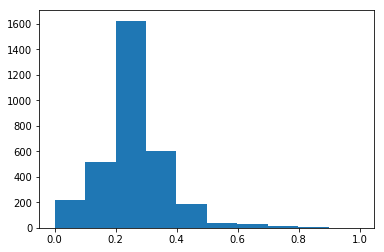

In [169]:
plt.hist(cal_db["MAD_N"]/cal_db["median_N"])

In [170]:
flux_uncertainty_L_threshold = 0.1
flux_uncertainty_N_threshold = 0.4

cal_db = cal_db[((cal_db["MAD_L"]/cal_db["median_L"]) < flux_uncertainty_L_threshold) &
                ((cal_db["MAD_N"]/cal_db["median_N"]) < flux_uncertainty_N_threshold)]

print("There remain {0} calibrators with flux uncertainties in L and N less than {1:.0f}% and {2:.0f}% respectively".format(len(cal_db),100*flux_uncertainty_L_threshold,100*flux_uncertainty_N_threshold))

There remain 1266 calibrators with flux uncertainties in L and N less than 10% and 40% respectively


### Select by DEC
We only select by declination here since the required coordinate transform takes some time on the full catalogue

In [171]:
dec_threshold = 30 * u.deg
dec = coord.Angle(cal_db["DEJ2000"],unit=u.deg)
cal_db = cal_db[dec < dec_threshold]

print("There remain {0} calibrators in the southern hemisphere".format(len(cal_db)))

There remain 917 calibrators in the southern hemisphere


#### Flux distribution of good calibrators

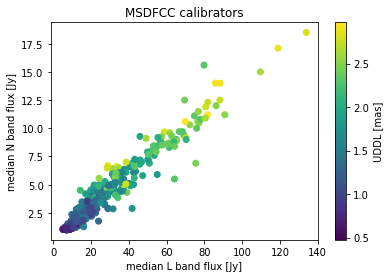

In [172]:
plt.scatter(cal_db_plot["median_L"],cal_db_plot["median_N"],c=cal_db_plot["UDDL_est"])
plt.xlabel("median L band flux [Jy]")
plt.ylabel("median N band flux [Jy]")
titlestring="MSDFCC calibrators"
plt.colorbar(label="UDDL [mas]")
plt.title(titlestring)

#### Skymap of good calibrators

/usr/local/Cellar/python3/3.6.1/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/projections/geo.py:493: RuntimeWarning: invalid value encountered in arcsin
  theta = np.arcsin(y / np.sqrt(2))


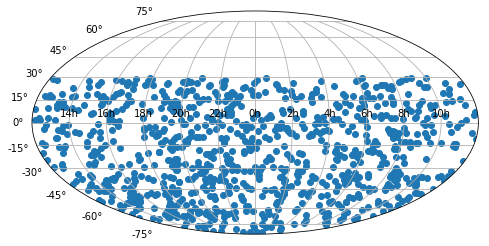

In [173]:
ra = coord.Angle(cal_db["RAJ2000"],unit=u.hourangle)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(cal_db["DEJ2000"],unit=u.deg)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

## Hybrid calibrators for MATISSE UT observations
A hybrid calibrator is a calibrator that can be used for both L and N band calibration.

In [200]:
N_limit_UT=5
L_limit_UT=1
cal_db_hybrid_UT = cal_db[(cal_db["median_L"] > L_limit_UT) & (cal_db["median_N"] > N_limit_UT)]
print("There are {0} hybrid calibrators for UT observations".format(len(cal_db_hybrid_UT)))

There are 173 hybrid calibrators for UT observations


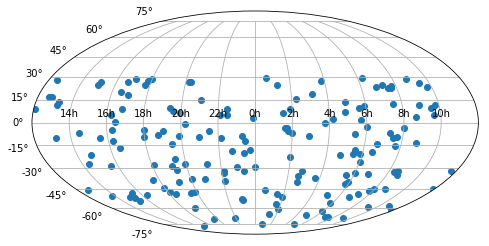

In [201]:
import astropy.coordinates as coord
from astropy import units as u
ra = coord.Angle(cal_db_hybrid_UT["RAJ2000"],unit=u.hourangle)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(cal_db_hybrid_UT["DEJ2000"],unit=u.deg)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [202]:
# show table of UT hybrid calibrators
from astropy.table import Table
t=Table([cal_db_hybrid_UT["Name"],
         cal_db_hybrid_UT["SpType"],
         cal_db_hybrid_UT["RAJ2000"],
         cal_db_hybrid_UT["DEJ2000"],
         cal_db_hybrid_UT["UDDL_est"],
         cal_db_hybrid_UT["median_L"],
         cal_db_hybrid_UT["median_N"]],
        names=["Name","SpType","RAJ2000","DEJ2000","UDDL_est","median_L","median_N"])
t.show_in_notebook()

idx,Name,SpType,RAJ2000,DEJ2000,UDDL_est,median_L,median_N
0,* eps And,G7IIIFe-3CH1,00:38:33.3461,+29:18:42.314,1.834,42.486,5.0131
1,* mu. Phe,G8III,00:41:19.5523,-46:05:06.018,1.729,35.871,5.36
2,* lam Hyi,K4III,00:48:35.4165,-74:55:24.373,2.057,49.223,6.2
3,* phi Psc,K0III,01:13:44.9464,+24:35:01.359,1.653,31.7,5.93
4,V* DE Tuc,M4III,01:17:35.0278,-65:12:42.382,2.873,33.4288,6.6
5,* mu. Psc,K3III,01:30:11.1144,+06:08:37.758,2.459,77.16,10.5
6,* del Phe,G8.5IIIb,01:31:15.1048,-49:04:21.731,2.277,69.1,9.4
7,* alf Eri,B6Vpe,01:37:42.8455,-57:14:12.310,1.77,130.7,16.4
8,HD 10024,M0III,01:37:52.0690,-03:26:26.440,1.955,27.7793,5.25
9,HD 10550,K2/3IIICNII,01:42:43.5111,-03:41:24.725,2.044,50.2,7.25


## Hybrid calibrators for MATISSE AT observations

In [207]:
N_limit_AT=8
L_limit_AT=5
cal_db_hybrid_AT = cal_db[(cal_db["median_L"] > L_limit_AT) & (cal_db["median_N"] > N_limit_AT)]
print("There are {0} hybrid calibrators for AT observations".format(len(cal_db_hybrid_AT)))

There are 71 hybrid calibrators for AT observations


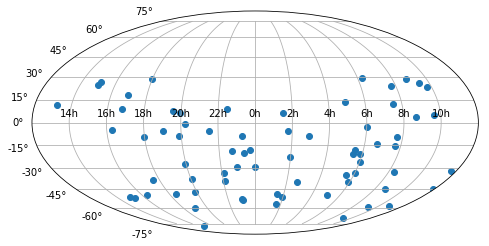

In [208]:
ra = coord.Angle(cal_db_hybrid_AT["RAJ2000"],unit=u.hourangle)
ra = ra.wrap_at(180*u.degree)
dec = coord.Angle(cal_db_hybrid_AT["DEJ2000"],unit=u.deg)
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection="mollweide")
ax.scatter(ra.radian, dec.radian)
ax.set_xticklabels(['14h','16h','18h','20h','22h','0h','2h','4h','6h','8h','10h'])
ax.grid(True)

In [209]:
# show table of AT hybrid calibrators
from astropy.table import Table
t=Table([cal_db_hybrid_AT["Name"],
         cal_db_hybrid_AT["SpType"],
         cal_db_hybrid_AT["RAJ2000"],
         cal_db_hybrid_AT["DEJ2000"],
         cal_db_hybrid_AT["UDDL_est"],
         cal_db_hybrid_AT["median_L"],
         cal_db_hybrid_AT["median_N"]],
        names=["Name","SpType","RAJ2000","DEJ2000","UDDL_est","median_L","median_N"])
t.show_in_notebook()

idx,Name,SpType,RAJ2000,DEJ2000,UDDL_est,median_L,median_N
0,* mu. Psc,K3III,01:30:11.1144,+06:08:37.758,2.459,77.16,10.5
1,* del Phe,G8.5IIIb,01:31:15.1048,-49:04:21.731,2.277,69.1,9.4
2,* alf Eri,B6Vpe,01:37:42.8455,-57:14:12.310,1.77,130.7,16.4
3,HD 10824,K5III,01:45:59.2597,-05:43:59.883,2.42,53.782,8.701
4,* chi Eri,G8IIIbCNIV,01:55:57.4721,-51:36:32.032,2.059,65.1191,9.0
5,* 56 Cet,K3III,01:56:40.1986,-22:31:36.425,2.673,70.036,9.2
6,* iot Eri,K0IIIb,02:40:40.0350,-39:51:19.354,2.525,65.3,8.9
7,* eta Eri,K1+IIIb,02:56:25.6495,-08:53:53.322,2.496,86.18,12.0
8,* omi02 Ori,K2-IIIb,04:56:22.2761,+13:30:52.093,2.748,88.2,12.5
9,* eta02 Pic,K5III,05:04:58.0145,-49:34:40.208,2.729,81.8,12.3
